<h1 style="text-align:center;">LSTM for Bonn University Epilepsy Dataset</h1>
<table style="border-collapse: collapse;">
  <tr style="border: 1px solid #dddddd;">
    <th style="border: 1px solid #dddddd;">A </th>
    <th style="border: 1px solid #dddddd;">B</th>
    <th style="border: 1px solid #dddddd;">C</th>
    <th style="border: 1px solid #dddddd;">D</th>
    <th style="border: 1px solid #dddddd;">E</th>
  </tr>
    <tr style="border: 1px solid #dddddd;">
    <td style="border: 1px solid #dddddd;">Non-Epileptic</td>
    <td style="border: 1px solid #dddddd;">MNon-Epileptic</td>
    <td style="border: 1px solid #dddddd;">Epileptic</td>
    <td style="border: 1px solid #dddddd;">Epileptic</td>
    <td style="border: 1px solid #dddddd;">Epileptic</td>
   </tr>
   
  <tr style="border: 1px solid #dddddd;">
    <td style="border: 1px solid #dddddd;">Eyes Opened</td>
    <td style="border: 1px solid #dddddd;">Eyes Closed</td>
    <td style="border: 1px solid #dddddd;">Interictal</td>
    <td style="border: 1px solid #dddddd;">Interictal</td>
    <td style="border: 1px solid #dddddd;">Ictal</td>
   </tr>
</table>

# 1. Loading the data

Remarque: changer le chemin du dataset correspondante

In [ ]:
import glob
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
# INSTALL RAVE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from tqdm import tqdm

#tqdm library instantly make your loops show a smart progress bars.
#It gives "Code Execution Time" and Estimated Time for the code to complete
#This would help while working on huge datasets

DATA_DIR_A = r'/content/drive/MyDrive/Colab Notebooks/EEG/Dataset/A/'
DATA_DIR_B = r'/content/drive/MyDrive/Colab Notebooks/EEG/Dataset/B/'
DATA_DIR_C = r'/content/drive/MyDrive/Colab Notebooks/EEG/Dataset/C/'
DATA_DIR_D = r'/content/drive/MyDrive/Colab Notebooks/EEG/Dataset/D/'
DATA_DIR_E = r'/content/drive/MyDrive/Colab Notebooks/EEG/Dataset/E/'
#changer le chemin du dataset correspondante
  
LABEL_C1 = 0
LABEL_C2 = 1
LABEL_C3 = 2

def load_data():
    data = []
    nbFiles = 0
    for fname in tqdm(os.listdir(DATA_DIR_A)):
        img = np.loadtxt(DATA_DIR_A + fname) #Load data from a text file and returns a numpy ndarray, it's a fast reader for simple text files. By default, the delimiter is a whitespace.
        data.append([np.array(img), np.array(LABEL_C1)]) 
        nbFiles+=1

    for fname in tqdm(os.listdir(DATA_DIR_B)):
        img = np.loadtxt(DATA_DIR_B + fname)
        data.append([np.array(img), np.array(LABEL_C1)])
        nbFiles+=1    
    
    for fname in tqdm(os.listdir(DATA_DIR_C)):
        img = np.loadtxt(DATA_DIR_C + fname)
        data.append([np.array(img), np.array(LABEL_C2)])
        nbFiles+=1

    for fname in tqdm(os.listdir(DATA_DIR_D)):
        img = np.loadtxt(DATA_DIR_D + fname)
        data.append([np.array(img), np.array(LABEL_C2)])
        nbFiles+=1

    for fname in tqdm(os.listdir(DATA_DIR_E)):
        img = np.loadtxt(DATA_DIR_E + fname)
        data.append([np.array(img), np.array(LABEL_C2)])
        nbFiles+=1
        
    return data


data = load_data()
print(len(data), "Files")#data is list of 500 arrays

100%|██████████| 100/100 [00:01<00:00, 66.83it/s]

500 Files


<h2><b><font color="purple">Visualize the data</font></b></h2>

<ipython-input-43-365cb779d5a0>:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(421)
<ipython-input-43-365cb779d5a0>:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(422)


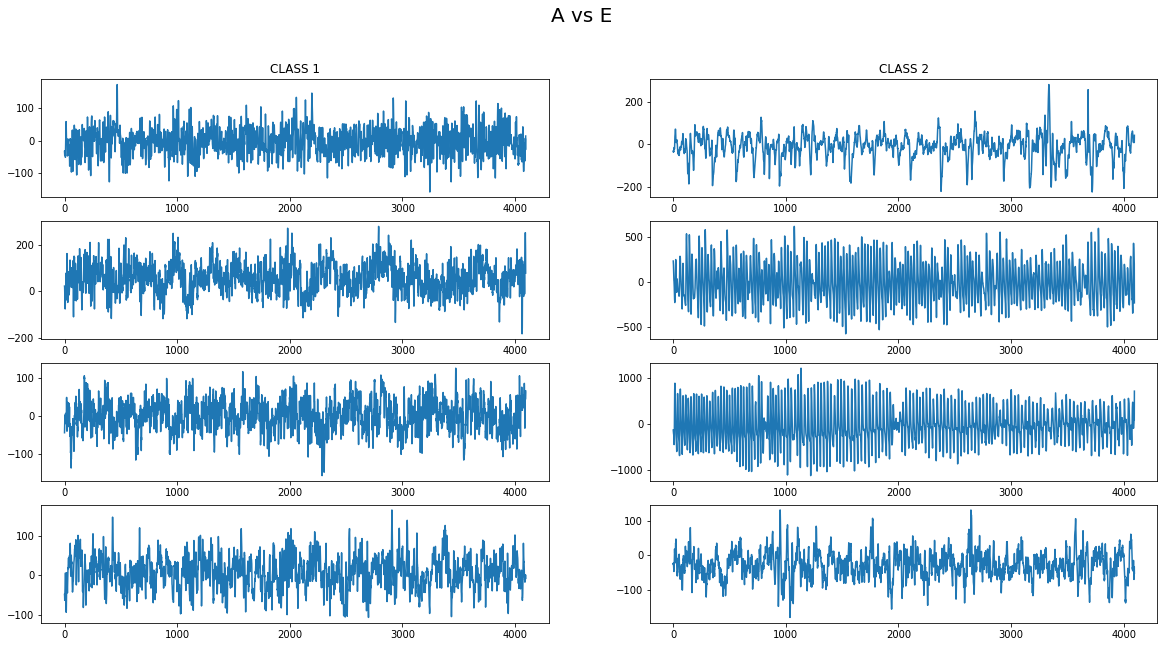

In [ ]:
import random
mpl.rcParams['figure.figsize'] = (20,10)

fig = plt.figure()

samples_c1 = np.empty((0, 4097), int)
while len(samples_c1) < 4:
    curID = random.randint(0, len(data))
    if data[curID][1] == LABEL_C1:
        samples_c1 = np.vstack((samples_c1, data[curID][0]))
        
samples_c2 = np.empty((0, 4097), int)
while len(samples_c2) < 4:
    curID = random.randint(0, len(data))
    if data[curID][1] == LABEL_C2:
        samples_c2 = np.vstack((samples_c2, data[curID][0]))

# samples_c3 = np.empty((0, 4097), int)
# while len(samples_c3) < 4:
#     curID = random.randint(0, len(data))
#     if data[curID][1] == LABEL_C2:
#         samples_c3 = np.vstack((samples_c3, data[curID][0]))

# samples_c4 = np.empty((0, 4097), int)
# while len(samples_c4) < 4:
#     curID = random.randint(0, len(data))
#     if data[curID][1] == LABEL_C2:
#         samples_c4 = np.vstack((samples_c4, data[curID][0]))

# samples_c5 = np.empty((0, 4097), int)
# while len(samples_c5) < 4:
#     curID = random.randint(0, len(data))
#     if data[curID][1] == LABEL_C2:
#         samples_c5 = np.vstack((samples_c5, data[curID][0]))

#visualize class A (Non epileptic) and class E  (epileptic)     
for i in range(0, 4):
    plt.subplot(421 + i * 2)
    plt.plot(samples_c1[i])
    plt.subplot(421 + i * 2 + 1)
    plt.plot(samples_c2[i])

ax = plt.subplot(421)
ax.set_title("CLASS 1")
ax = plt.subplot(422)
ax.set_title("CLASS 2")

fig.suptitle("A vs E", fontsize=20)
plt.show()

# 2. Data Preprocessing

There are several reasons why preprocessing is necessary for EEG data. First of all, the signals that are picked up from the scalp are not necessarily an accurate representation of the signals originating from the brain, as the spatial information gets lost. Secondly, EEG data tends to contain a lot of noise which can obscure weaker EEG signals. Artifacts such as blinking or muscle movement can contaminate the data and distort the picture. Finally, we want to separate the relevant neural signals from random neural activity that occurs during EEG recordings.

The EEG signals produce a huge amount of redundant data, which highly affect the process of EEG analysis

In [ ]:
#PCA

# 2. Feature Extraction: Wavelets

Discerte wavelet transform is just another form of representing the signal and does not change the information content in the signal. The wavelet series is simply a sampled version of the continuous wavelet transform and the information provided by it is highly redundant as far as the reconstruction of the signal is concerned.

DWT is more efficient in removing redundancy than CWT. It provides sufficient information both for the analysis and synthesis of the original signal. DWT is easy to implement, reduces the computation time and also resource required in comparison to CWT. To yield high computation of wavelet transform, DWT is based on sub-band coding.

In [ ]:
import pywt
import pywt.data

The wavelet analysis decomposes the EEG signals into separate subband channels to unravel the superposition of different structures.

the EEG signal is decomposed into four levels for extraction of the dominant frequency component. The wavelet coefficients at various levels are retained to provide the frequencies required for signal classification.

For EEG signals, the Daubechies wavelet of order 2 (db2) is the most efficient at detecting various changes.

In [ ]:
# for i in range(4):
#    sample_c1[i]=pywt.wavedec(samples_c1[i], 'db2',mode='sym', level=4)
#    sample_c2[i]=pywt.wavedec(samples_c2, 'db2',mode='sym', level=4)
# data=sample_c1
# data.append(sample_c2)
# print(len(data[0][0]))

258


# Prepare the data!

In [ ]:
from sklearn.utils import shuffle
data = shuffle(data)

nb_train = round(len(data) * 0.8)
data_train = data[0:nb_train]
data_test = data[nb_train:]

X_train = np.array([d[0] for d in data_train])
Y_train = np.array([d[1] for d in data_train])

X_test = np.array([d[0] for d in data_test])
Y_test = np.array([d[1] for d in data_test])

X_train = X_train.reshape(X_train.shape[0], 4097,1)
Y_train = Y_train.reshape(Y_train.shape[0], 1)

X_test = X_test.reshape(X_test.shape[0], 4097, 1)
Y_test = Y_test.reshape(Y_test.shape[0], 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM

#num_steps = 30
batch_size = 4
epochs = 10
hidden_size = 64
use_dropout=True

model = Sequential()
model.add(LSTM(hidden_size, input_shape=(4097,1)))
#model.add(LSTM(64, return_sequences=False))

if use_dropout:
  model.add(Dropout(0.35))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mae', 'acc'])

print(model.summary())

history = model.fit(X_train, Y_train, validation_split=0.2, batch_size=batch_size, epochs=epochs)
score = model.evaluate(X_test, Y_test, batch_size=batch_size)

#checkpointer = ModelCheckpoint(filepath=data_path + '/model-{epoch:02d}.hdf5', verbose=1)


# 1 LSTM with 64 (4097,1)
# Adam, Binary_CrossEntropy, Batch Size 4, Epoch 20
# --> 99 - 100% Accuracy (A <-> E)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
80/80 [==============================] - 76s 920ms/step - loss: 0.7052 - mae: 0.4931 - acc: 0.5125 - val_loss: 0.6533 - val_mae: 0.4741 - val_acc: 0.5875
Epoch 2/10
80/

dict_keys(['loss', 'mae', 'acc', 'val_loss', 'val_mae', 'val_acc'])


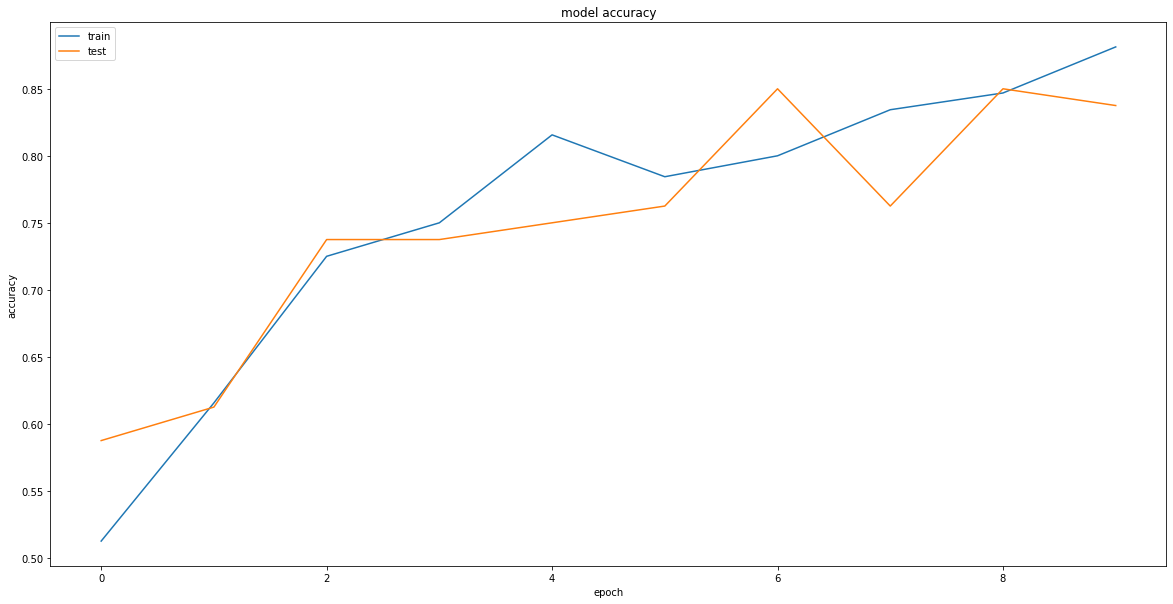

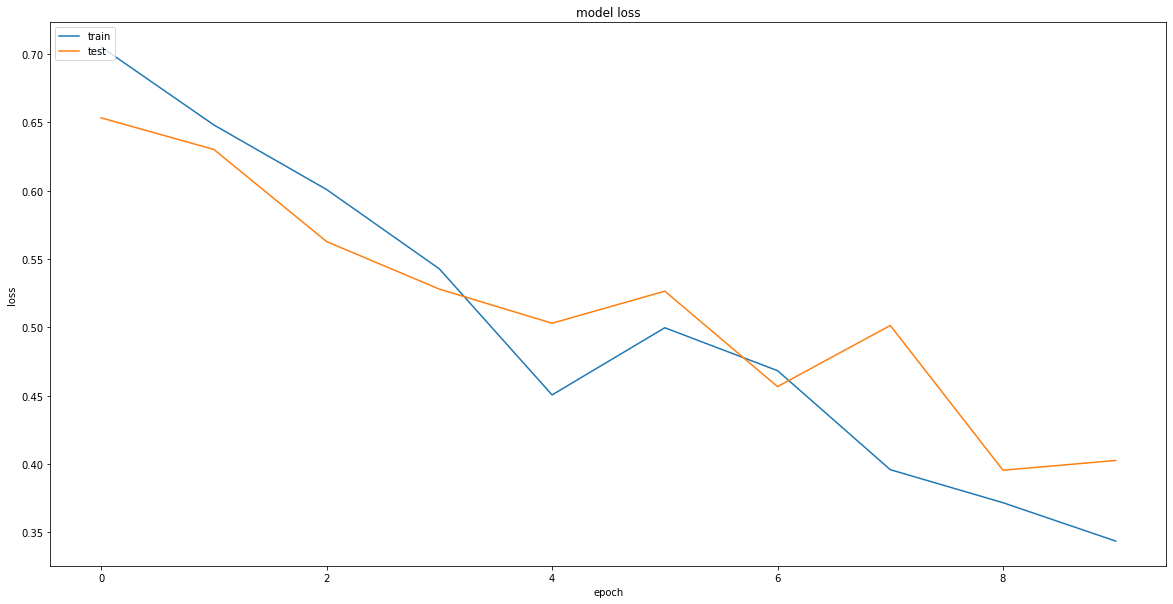

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 3. Feature selection


# 4. classification

4097
